<font color='steelblue' size=5><b>Комментарий ревьюера</b></font>

<font color='steelblue'>Привет, Евгений! Меня зовут Михаил Костин, я буду проверять этот проект. Спасибо за проделанную работу! Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на "вы".</font>

<font color='steelblue'>Я буду использовать различные цвета и знаки, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='steelblue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='darkorange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание или что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).</font>

<font color='crimson'>❌ и красный текст - есть аспекты, с которыми принять проект в данной итерации не получится</font>

---

<font color='steelblue'>Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям - **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения.
Например, так: <b>Комментарий студента</b>

Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. 

<b>Давай смотреть, что получилось!</b></font> 

# Выбор локации для скважины

От добывающей компании «ГлавРосГосНефть» предоставлены пробы нефти в трёх регионах: в каждом из 10 000 месторождений региона измерили качество нефти и объём её запасов. 

Цель исследования: принять решение, в каком регионе бурить новую скважину, чтобы добыча приносила наибольшую прибыль. 

Для этого необходимо построить модель машинного обучения по данным геологоразведки в каждом из 3-х регионов на основании трёх значимых признаков нефти в каждой из 100 тысяч предполагаемых скважин региона. Целевой признак: объём запасов в скважине в тыс.баррелях. Необходимо проанализировать возможную прибыль и риски техникой *Bootstrap.*

План выбора локации для скважины:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков (наши исходные данные);
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Оглавление


1. [Загрузка и подготовка данных](#paragraph1)

   1.1. [Вывод](#subparagraph1)
 
 
2. [Обучение и проверка модели](#paragraph2)

   2.1. [Вывод](#subparagraph2)
                     

3. [Подготовка к расчёту прибыли](#paragraph3)

   3.1. [Вывод](#subparagraph3)
        

4. [Расчёт прибыли и рисков](#paragraph4)

   4.1. [Вывод](#subparagraph4)
        

5. [Общий вывод](#paragraph5)    

## Загрузка и подготовка данных<a name="paragraph1"></a>

In [1]:
# импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Хорошо, есть описание, импорты в одном месте.
</font>

In [2]:
# чтение файла с разных источников

try:
    geo_1 = pd.read_csv('/datasets/geo_data_0.csv')
    geo_2 = pd.read_csv('/datasets/geo_data_1.csv')
    geo_3 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    geo_1 = pd.read_csv('C:/Users/Evgenii/Downloads/DS Yandex/Projects/geo_data_0.csv')
    geo_2 = pd.read_csv('C:/Users/Evgenii/Downloads/DS Yandex/Projects/geo_data_1.csv')
    geo_3 = pd.read_csv('C:/Users/Evgenii/Downloads/DS Yandex/Projects/geo_data_2.csv')
display(geo_1.head())
display(geo_2.head())
display(geo_3.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [3]:
# информация об отсутствии пропусков и типе данных

display(geo_1.info())
display(geo_2.info())
display(geo_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.4+ MB


None

In [4]:
# посмотрим на числовые характеристики данных: max, min, среднее

display(geo_1.describe())
display(geo_2.describe())
display(geo_3.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


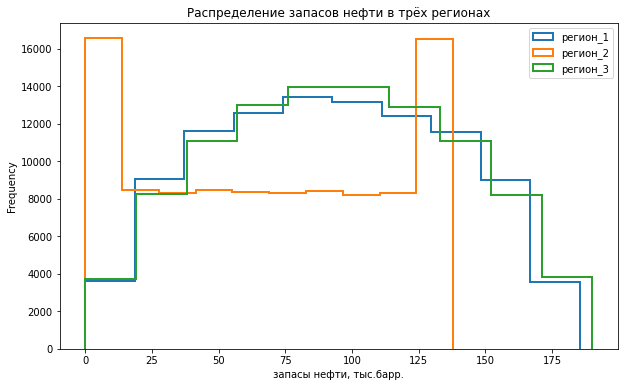

In [5]:
# посмотрим на распределение запасов нефти в каждом регионе

plt.xlabel('запасы нефти, тыс.барр.')
geo_1['product'].plot(kind='hist', histtype='step', bins=10, linewidth=2, label='регион_1', legend=True, 
                      title='Распределение запасов нефти в трёх регионах', figsize=(10,6))
geo_2['product'].plot(kind='hist', histtype='step', bins=10, linewidth=2, label='регион_2', legend=True)
geo_3['product'].plot(kind='hist', histtype='step', bins=10, linewidth=2, label='регион_3', legend=True);

*В регионах 1 и 3 - нормальное распределение запасов, а в регионе 2 скважины, в основном, либо с очень маленьким, либо с очень большим объёмом запасов.*

In [6]:
# проверка данных на явные дубликаты
print("Дубликатов в регионе 1:", geo_1.duplicated().sum())
print("Дубликатов в регионе 2:", geo_2.duplicated().sum())
print("Дубликатов в регионе 3:", geo_3.duplicated().sum())

Дубликатов в регионе 1: 0
Дубликатов в регионе 2: 0
Дубликатов в регионе 3: 0


In [7]:
# проверка id скважин на дубликаты и вывод дубликатов id по региону 1
id_dupl = geo_1[geo_1['id'].duplicated()]['id'].values
display(geo_1.query('id in @id_dupl').sort_values(by='id'))

# проверка id скважин на дубликаты и вывод дубликатов id по региону 2
id_dupl = geo_2[geo_2['id'].duplicated()]['id'].values
display(geo_2.query('id in @id_dupl').sort_values(by='id'))

# проверка id скважин на дубликаты и вывод дубликатов id по региону 3
id_dupl = geo_3[geo_3['id'].duplicated()]['id'].values
display(geo_3.query('id in @id_dupl').sort_values(by='id'))

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


*По условию задачи все скважины уникальны, но тем не менее имеются 10 пар скважин с одним ID в регионе 1, и по 4 пары скважин с одним ID в регионах 2 и 3. Поскольку значения признаков явно свидетельствуют о том, что речь идёт о разных скважинах, то есть веские основания полагать, что скважины с одним и тем же ID всё-таки разные и произошёл технический сбой в наименовании.*

*Оставим все данные как есть, тем более, что ID скважины несёт справочную информацию и не будет являться признаком для последующего построения модели.*

In [8]:
# матрицы корреляции данных для проверки на мультиколлинеарность, утечку данных
display(geo_1.corr())
display(geo_2.corr())
display(geo_3.corr())

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


*Во 2-м регионе признак "f2" очень сильно коррелирует с запасами, то есть признак коррелирует с целевым признаком. Поскольку нам неясно, насколько значим этот конкретный признак (вероятно, что значим ввиду малого числа признаков), то имеет смысл включить этот признак в список features для модели линейной регрессии по региону 2.*

### Вывод к первому разделу <a name="subparagraph1"></a>

*В данных нефтяной компании собрана информация о пробах нефти из 3-х разных регионов. В каждом регионе отобрано 100 тысяч перспективных нефтяных месторождений с информацией о трёх признаках качества нефти и объёме её запасов.* 

*Данные полные, без пропусков. Значения признаков качества нефти выглядят отмасштабированными, дальнейшая предобработка не требуется. Полных дубликатов строк нет, но есть несколько "задвоившихся" уникальных ID скважин, что, вероятно, техническая ошибка. Объёмы запсов нефти регионов 1 и 3 распределены нормально, в регионе 2 - скважины либо с малым объёмом запасов, либо с большим. Аномальных данных типа выбросов не наблюдается. Проверка на мультиколлинеарность показала в регионе 2 большую зависимость одного из признаков от объёма запасов. Ввиду большой вероятности значимости этого признака для определения объёма запасов можно включить этот признак в модель линейной регресии.* 

*На основании этих данных построим модель предсказания объёмов запасов для каждого региона.*

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Отличный анализ! С id действительно есть своего рода противоречие — не все строки с одинаковым id дубликаты. Хорошие полные выводы.
</font>

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ⚠️ <br>
<font color='darkorange'>
Также хочу напомнить тебе, что по условиям задачи мы ограничены использованием только линейных моделей, а значит, может иметь место быть проблема [мультиколлинеарности](http://www.machinelearning.ru/wiki/index.php?title=Мультиколлинеарность). Хорошо бы было проверить это перед дальнейшими действиями.
    
update. Вижу проверку далее по работе, отлично! Но все же мультиколлинеарность влияет на сами линейные модели, так что лучше проверять это до обучения.
</font>


<div class="alert alert-info"> <b>Комментарий студента:</b> Добрый день, Михаил! Благодарю за проверку проекта и содержательные комментарии. По комментарию выше: перенёс проверку на мультиколлинеарность путём вычисления коэффициента корреляции в конец первого раздела.
    
   Я так понимаю, из статей про мультиколлинеарность, что при сильной зависимости между фичами на линейных моделях лишние признаки надо убрать, а при зависимости фича-таргет смотреть, может ли быть даталик, насколько значим признак для определения таргета, и исходя из этого, принимать решение .</div>

<font color='steelblue'><b>Комментарий ревьюера v2: </b></font> ✔️ <br>
<font color='green'>
Абсолютно верно! При сильной корреляции между фичами для линейных моделей следует удалять одну из них или делать новую фичу взамен этих двух комбинируя их.
    
Согласен с выводом про фича-таргет.
</font> 

## Обучение и проверка модели<a name="paragraph2"></a>

In [9]:
# функция обучения и проверки модели предсказания запасов нефти для каждого региона

def region_metrics(geo):
    """
    Строит модель предсказания запасов нефти по признакам её качества и выводит: 
    - валидационную выборку целевого признака
    - предсказания модели
    - средний запас предсказанного сырья
    - RMSE модели
    - RMSE от среднего исходных данных целевого признака
    """
    # делим данные на признаки и целевой признак
    features = geo[['f0', 'f1', 'f2']]
    target = geo['product']

    #разбиение данных на обучающую и валидационную выборку 
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    
    # применим масштабирование StandardScaler к признакам
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    # инициализация, обучение и предсказание модели 
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predicted_valid) ** 0.5

    # средний предсказанный объём запасов
    predicted_product_avg = predicted_valid.mean()

    # подсчёт RMSE по усреднённым запасам обучающей выборки
    predicted_valid_avg = pd.Series(target_train.mean(), index=target_valid.index)
    rmse_avg = mean_squared_error(target_valid, predicted_valid_avg) ** 0.5
    
    return target_valid, predicted_valid, predicted_product_avg, rmse, rmse_avg

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ❌ <br>
<font color='darkorange'>
Напоминаю тебе, что при использовании линейных моделей действительно важно масштабировать признаки. 

Приведение значений признаков к одному диапазону ускорит схождение весов при использовании градиентного спуска. Также признаки с наибольшими абсолютными значениями будут вынуждать модель использовать большие, нестабильные коэф-ты. Подробнее можешь прочесть [тут](https://itchef.ru/articles/42114/)
    

</font>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил масштабирование признаков в функцию выше.
    
   Я держал в уме необходимость масштабирования, данные признаков изначально выглядели как уже отмасштабированные. Но у меня не отложилось, что у стандартизированных данных mean=0, std=1 (у нормализованных min=0, max=1). В твоей ссылке на этом чётко акцентируется. Можно было б мне раньше заметить по методу describe(). 
    
Касаемо конкретно этих данных, стандартизация никак не повлияла на последующие результаты (я проверил, что все features действительно сжались до mean=0, std=1), то есть, скорее всего, изначально каким-то другим методом сжали данные. Ещё немного откровением стало из статьи, что для древовидных моделей масштабирование бесполезно, как я понял .</div>

<font color='steelblue'><b>Комментарий ревьюера v2: </b></font> ✔️ <br>
<font color='green'>
Да, для деревянных действительно масштабирование бесполезно.
    
В нашем случае оно тоже не сыграло роли, но этап важный для линейных моделей и моделей, использующих меру расстояний между признаками, так что лучше не пропускать его 
</font> 

In [10]:
# выборка, предсказания, средние предсказанные запасы и RMSE по 1-му региону
target_1_valid, predicted_1_valid, predicted_product_1_avg, rmse_1, rmse_1_avg = region_metrics(geo_1)

# средние предсказанные объемы запасов и RMSE по 1-му региону
print("Cредний предсказанный объём запасов по 1-му региону:", predicted_product_1_avg)
print("RMSE по 1-му региону:", rmse_1)
print("RMSE от среднего объема по 1-му региону:", rmse_1_avg)

Cредний предсказанный объём запасов по 1-му региону: 92.59256778438035
RMSE по 1-му региону: 37.5794217150813
RMSE от среднего объема по 1-му региону: 44.289591053907365


In [11]:
# выборка, предсказания, средние предсказанные запасы и RMSE по 2-му региону
target_2_valid, predicted_2_valid, predicted_product_2_avg, rmse_2, rmse_2_avg = region_metrics(geo_2)

# средние предсказанные объемы запасов и RMSE по 2-му региону
print("Cредний предсказанный объём запасов по 2-му региону:", predicted_product_2_avg)
print("RMSE по 2-му региону:", rmse_2)
print("RMSE от среднего объема по 2-му региону:", rmse_2_avg)

Cредний предсказанный объём запасов по 2-му региону: 68.728546895446
RMSE по 2-му региону: 0.8930992867756153
RMSE от среднего объема по 2-му региону: 46.02144533725462


In [12]:
# выборка, предсказания, средние предсказанные запасы и RMSE по 3-му региону
target_3_valid, predicted_3_valid, predicted_product_3_avg, rmse_3, rmse_3_avg = region_metrics(geo_3)

# средние предсказанные объемы запасов и RMSE по 3-му региону
print("Cредний предсказанный объём запасов по 3-му региону:", predicted_product_3_avg)
print("RMSE по 3-му региону:", rmse_3)
print("RMSE от среднего объема по 3-му региону:", rmse_3_avg)

Cредний предсказанный объём запасов по 3-му региону: 94.96504596800489
RMSE по 3-му региону: 40.02970873393434
RMSE от среднего объема по 3-му региону: 44.90234968510566


*Средний предсказанный объём запасов по 1-му региону - 93 тыс.баррелей, по 2-му - 69 тыс.баррелей, по 3-му - 95 тыс.баррелей, что примерно соответствует типичному фактическому распределению запасов в 1-м и 3-м регионах. По 2-му региону из-за специфики большого количества скважин с малыми и большими запасами среднее предсказание примерно на уровне фактического среднего типичного малого и типичного большого значения запасов.*

*Показатель RMSE по 1-му и 3-му регионам немного ниже, чем RMSE от среднего объёма запасов, что говорит о том,что создание модели имеет смысл. RMSE по 2-му региону меньше 1, то есть отклонение модели от факта очень маленькое, модель практически идеальна из-за того, что один из признаков очень сильно коррелирует с запасами и, скорее всего, этот признак значим для определения запасов.*

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Отлично! Со всем согласен.
</font> 

In [13]:
# сведём данные по запасам предсказанного сырья и RMSE в таблицу

df_regions = pd.DataFrame(columns = ['region', 'stock_predicted', 'RMSE', 'RMSE_av'])
df_regions.loc[0] = [1, predicted_product_1_avg, rmse_1, rmse_1_avg]
df_regions.loc[1] = [2, predicted_product_2_avg, rmse_2, rmse_2_avg]
df_regions.loc[2] = [3, predicted_product_3_avg, rmse_3, rmse_3_avg]
df_regions['region'] = df_regions['region'].astype(int)
df_regions

,region,stock_predicted,RMSE,RMSE_av
0,1,92.592568,37.579422,44.289591
1,2,68.728547,0.893099,46.021445
2,3,94.965046,40.029709,44.902350


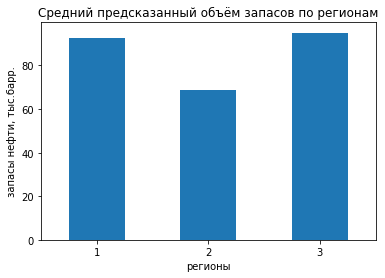

In [14]:
# диаграмма среднего предсказанного объёма запасов

df_regions.set_index('region')['stock_predicted'].plot(kind='bar', rot=0,
                                                      title='Средний предсказанный объём запасов по регионам')
plt.ylabel('запасы нефти, тыс.барр.')
plt.xlabel('регионы');

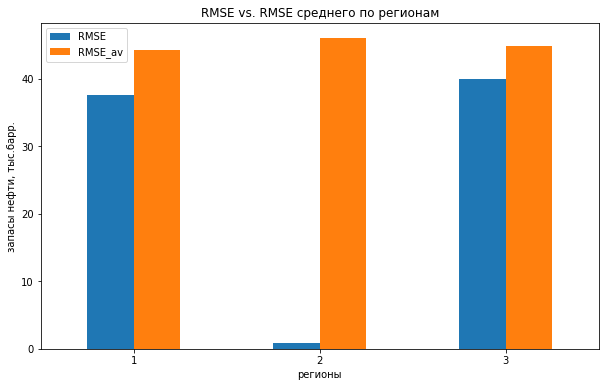

In [15]:
# диаграммы RMSE в сравнении с RMSE среднего значения

df_regions.set_index('region')[['RMSE', 'RMSE_av']].plot(kind='bar', rot=0, figsize=(10,6),
                                                        title='RMSE vs. RMSE среднего по регионам')
plt.ylabel('запасы нефти, тыс.барр.')
plt.xlabel('регионы');

### Вывод ко второму разделу <a name="subparagraph2"></a>

*Для каждого региона обучена и проверена по метрике RMSE (квадратный корень из средней квадратической ошибки) модель линейной регрессии по предсказанию запасов сырья в скважинах. Исходные данные разбиты на обучающую и валидационную выборки в соотношении 75/25. Средние запсы предсказанного сырья на валидационной выборке получились следующими:*

    -регион 1: 92.6 тыс. баррелей
    -регион 2: 68.7 тыс. баррелей
    -регион 3: 95.0 тыс. баррелей
    
 *В регионе 2 меньше всего ожидаемый средний запас сырья, примерно на 40% меньше, чем в регионах 1 и 3. Данные по средним запасам предсказанного сырья потребуются далее для расчёта прибыльности разработок.*
 
*Данные метрики RMSE на валидационной выборке (отклонения от верных значений) получились следующими:*

    -регион 1: 37.6 тыс. баррелей
    -регион 2: 0.9 тыс. баррелей
    -регион 3: 40 тыс. баррелей
    
*Отклонения от верных значений по регионам 1 и 3 меньше, чем если бы всегда предсказывали среднее значение запасов из обучающей выборки. То есть модель адекватна, имеет смысл её использовать. Отклонения по региону 2 минимальные в связи с большой зависимостью одного из признаков от запасов.*

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Хорошее заключение, дополнительно проведена проверка модели на адекватность 👍
</font> 

## Подготовка к расчёту прибыли<a name="paragraph3"></a>

In [16]:
# определение констант в переменные

# число исследуемых скважин
INV_POINTS = 500 

# число выбираемых лучших скважин
BEST_POINTS = 200

# региональный бюджет на разработку скважин
BUDGET = 1e10   

# доход с каждой тысячи баррелей 
INCOME_TH_BARR = 450 * 1000     

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ⚠️ <br>
<font color='darkorange'>
Все хорошо, но хочу обратить внимание на названия констант - по PEP-8 название констант записываются в верхнем регистре ([подробнее](https://peps.python.org/pep-0008/#constants)).

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо, не знал об этом. Где-то видел переменные в верхнем регистре, но списал это на заморочки программиста) </div>

<font color='steelblue'><b>Комментарий ревьюера v2: </b></font> ✔️ <br>
<font color='green'>
На самом деле это полезный навык и хорошо к нему привыкнуть. Такие условные правила позволяют всем писать в одном стиле и, следовательно, улучшают читаемость кода.
</font> 

In [17]:
# расходы на скважину
budget_per_point = BUDGET / BEST_POINTS     

# объём сырья для безубыточной разработки
product_0 = budget_per_point / INCOME_TH_BARR   
print('Объём сырья для безубыточной разработки скважины, тыс.барр.:', round(product_0, 1))

Объём сырья для безубыточной разработки скважины, тыс.барр.: 111.1


In [18]:
# средний запас сырья в каждом регионе
product_1_avg = geo_1['product'].mean()
product_2_avg = geo_2['product'].mean()
product_3_avg = geo_3['product'].mean()

print('Средний запас сырья в 1-м регионе:', round(product_1_avg, 1))
print('Средний запас сырья во 2-м регионе:', round(product_2_avg, 1))
print('Средний запас сырья в 3-м регионе:', round(product_3_avg, 1))

Средний запас сырья в 1-м регионе: 92.5
Средний запас сырья во 2-м регионе: 68.8
Средний запас сырья в 3-м регионе: 95.0


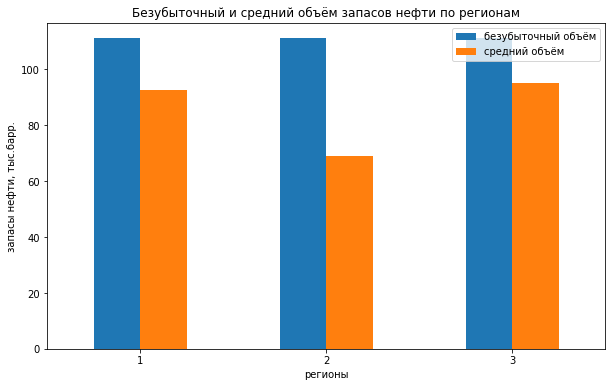

In [19]:
# диаграмма сравнения безубыточного и среднего объёмов

df_avg_product = pd.DataFrame(columns = ['регион', 'безубыточный объём', 'средний объём'])
df_avg_product.loc[0] = [1, product_0, product_1_avg]
df_avg_product.loc[1] = [2, product_0, product_2_avg]
df_avg_product.loc[2] = [3, product_0, product_3_avg]
df_avg_product['регион'] = df_avg_product['регион'].astype(int)

df_avg_product.set_index('регион').plot(kind='bar', rot=0, figsize=(10,6),
                                                        title='Безубыточный и средний объём запасов нефти по регионам')
plt.ylabel('запасы нефти, тыс.барр.')
plt.xlabel('регионы');

In [20]:
# число безубыточных скважин в каждом регионе
well_1_profit = geo_1.loc[geo_1['product'] > product_0, 'product'].count()
well_2_profit = geo_2.loc[geo_2['product'] > product_0, 'product'].count()
well_3_profit = geo_3.loc[geo_3['product'] > product_0, 'product'].count()

print('Число безубыточных скважин в 1-м регионе:', well_1_profit)
print('Число безубыточных скважин во 2-м регионе:', well_2_profit)
print('Число безубыточных скважин в 3-м регионе:', well_3_profit)

Число безубыточных скважин в 1-м регионе: 36583
Число безубыточных скважин во 2-м регионе: 16537
Число безубыточных скважин в 3-м регионе: 38178


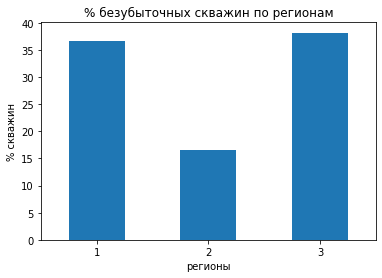

In [21]:
# диаграмма % безубыточных скважин по регионам

df_avg_product['% безубыточных'] = [well_1_profit/len(geo_1['product'])*100, well_2_profit/len(geo_2['product'])*100,
                                   well_3_profit/len(geo_3['product'])*100]

df_avg_product.set_index('регион')['% безубыточных'].plot(kind='bar', rot=0,
                                                      title='% безубыточных скважин по регионам')
plt.ylabel('% скважин')
plt.xlabel('регионы');

### Вывод к третьему разделу <a name="subparagraph3"></a>

*На основе исходных данных-констант (числа выбираемых скважин, дохода с каждой тысячи баррелей и регионального бюджета на разработку скважин) рассчитан объём нефти, которую надо добыть из скважины, чтобы разработка оказалась безубыточной.*

*Безубыточный объём запасов - 111.1 тыс.баррелей, что больше, чем средние запасы в каждом из регионов: по региону 1 - 92.5, региону 2 - 68.8, региону 3 - 95 тыс.баррелей соответственно.*

*Очевидно, что есть риск выбора убыточных скважин для последующей разработки. В следующем разделе оценим степень этого риска при выборе нужного нам числа скважин.*

*Кроме того, можно оценить процент безубыточных скважин от общего числа в генеральной совокупности скважин. Доля безубыточных скважин по регионам:*

    - регион 1 - 36.6% скважин 
    - регион 2 - 16.5% скважин
    - регион 3 - 38.2% скважин

*Возможно, прибыль одних скважин перекроет убытки других. В следующем разделе выберем скважины и подсчитаем для них прибыль.*

<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Все верно. Средние значения говорят, что большинство скважин нам не подходит, поэтому мы и разрабатываем нашу модель — без нее наугад ничего не получится.
</font>

## Расчёт прибыли и рисков<a name="paragraph4"></a> 

In [22]:
# функция расчёта прибыли по выбранным скважинам и предсказаниям

def profit_region(target_valid, predicted_valid):
    """
    Функция принимает объём запасов и предсказаний модели и выводит общую прибыль для лучших предсказаний 
    """
    # выбор 200 лучших предсказаний
    best_predictions = pd.Series(predicted_valid).sort_values(ascending=False)[:BEST_POINTS]
    
    # удаление старой индексаци времён разделения на выборки
    target_valid.reset_index(drop=True, inplace=True)
    
    # целевой объём сырья, соответствующий 200 лучшим предсказаниям
    product_total = target_valid[best_predictions.index].sum()
    
    # расчёт общей прибыли
    profit = product_total * INCOME_TH_BARR - BUDGET
    
    return profit

In [23]:
# расчёт прибыли для лучших 200 скважин по каждому региону
profit_1 = profit_region(target_1_valid, predicted_1_valid)
profit_2 = profit_region(target_2_valid, predicted_2_valid)
profit_3 = profit_region(target_3_valid, predicted_3_valid)

print('Прибыль для лучших скважин 1-го региона:', profit_1)
print('Прибыль для лучших скважин 2-го региона:', profit_2)
print('Прибыль для лучших скважин 3-го региона:', profit_3)

Прибыль для лучших скважин 1-го региона: 3320826043.1398506
Прибыль для лучших скважин 2-го региона: 2415086696.681511
Прибыль для лучших скважин 3-го региона: 2710349963.5998325


*Мы рассчитали максимальную прибыль для лучших 200 скважин каждого региона, то есть прибыль при самом благоприятном раскладе выбора скважин (от 2.4 до 3.3 млрд.рублей). Посмотрим, какова будет средняя прибыль, если скважины будем отбирать случайным образом.*

In [24]:
# функция расчёта прибыли и рисков для каждого региона

def profit_distr(target_valid, predicted_valid):
    """
    Функция принимает объём запасов и предсказаний модели и выводит: 
    - 1000 возможных значений прибыли
    - среднюю прибыль
    - 95%-й доверительный интервал прибыли
    - риск (вероятность) убытков
    """
    
    # найдём распределение прибыли из 1000 выборок по 500 точек разаработки
    state = np.random.RandomState(12345)

    profits = []
    for _ in range(1000):
    
        # случайно выбираем 500 скважин и соответствующие им предсказания
        target_subsample = target_valid.sample(n=INV_POINTS, replace=False, random_state=state)
        predicted_subsample = predicted_valid[target_subsample.index]
    
        # заносим в список прибыль 200 лучших скважин из отобранных ранее 500
        profits.append(profit_region(target_subsample, predicted_subsample))

    profits = pd.Series(profits)
    
    # средняя прибыль по региону в млн.руб.
    profits_mean = round(profits.mean() / 1e6, 1)
    
    # доверительный 95%-й интервал прибыли по региону в млн.руб
    conf_int = [profits.quantile(q=0.025), profits.quantile(q=0.975)]
    conf_int = [round(v/1e6, 1) for v in conf_int]
    
    # риск (вероятность) убытков
    losses_prob = round(len(profits[profits < 0]) / len(profits) * 100, 1)
    
    return profits, profits_mean, conf_int, losses_prob

Средняя прибыль для 1-го региона, млн.руб.: 380.7
Доверительный 95%-й интервал прибыли для 1-го региона, млн.руб.: [-126.9, 879.6]
Риск убытков для 1-го региона, %: 7.2


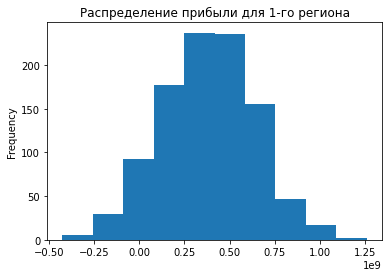

In [25]:
# средняя прибыль, интервал и риск убытков для 1-го региона

profits_1, profits_mean_1, conf_int_1, losses_prob_1 = profit_distr(target_1_valid, predicted_1_valid)
print('Средняя прибыль для 1-го региона, млн.руб.:', profits_mean_1)
print('Доверительный 95%-й интервал прибыли для 1-го региона, млн.руб.:', conf_int_1)
print('Риск убытков для 1-го региона, %:', losses_prob_1)
profits_1.plot(kind='hist', bins=10, title='Распределение прибыли для 1-го региона',);

Средняя прибыль для 2-го региона, млн.руб.: 448.2
Доверительный 95%-й интервал прибыли для 2-го региона, млн.руб.: [70.9, 893.0]
Риск убытков для 2-го региона, %: 1.4


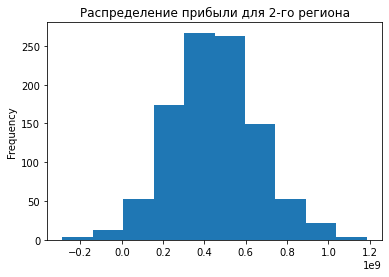

In [26]:
# средняя прибыль, интервал и риск убытков для 2-го региона

profits_2, profits_mean_2, conf_int_2, losses_prob_2 = profit_distr(target_2_valid, predicted_2_valid)
print('Средняя прибыль для 2-го региона, млн.руб.:', profits_mean_2)
print('Доверительный 95%-й интервал прибыли для 2-го региона, млн.руб.:', conf_int_2)
print('Риск убытков для 2-го региона, %:', losses_prob_2)
profits_2.plot(kind='hist', bins=10, title='Распределение прибыли для 2-го региона',);

Средняя прибыль для 3-го региона, млн.руб.: 402.8
Доверительный 95%-й интервал прибыли для 3-го региона, млн.руб.: [-143.7, 963.0]
Риск убытков для 3-го региона, %: 7.1


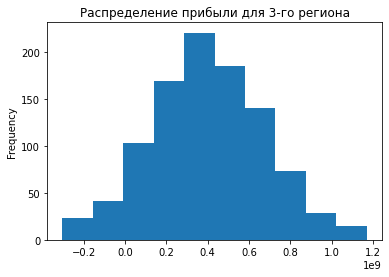

In [27]:
# средняя прибыль, интервал и риск убытков для 3-го региона

profits_3, profits_mean_3, conf_int_3, losses_prob_3 = profit_distr(target_3_valid, predicted_3_valid)
print('Средняя прибыль для 3-го региона, млн.руб.:', profits_mean_3)
print('Доверительный 95%-й интервал прибыли для 3-го региона, млн.руб.:', conf_int_3)
print('Риск убытков для 3-го региона, %:', losses_prob_3)
profits_3.plot(kind='hist', bins=10, title='Распределение прибыли для 3-го региона',);

### Вывод к четвертому разделу <a name="subparagraph4"></a>

*Исследовано 500 точек разработки добычи нефти по каждому региону. Из них с помощью техники Bootstrap отобрано случайным образом 1000 выборок из объёма добычи и предсказаний, чтобы уже по 200-м лучшим точкам рассчитать 1000 возможных значений общей прибыли. Распределние возможной прибыли по всем регионам нормальное, значения средней прибыли получены следующие:*

    - регион 1 - 380.7 млн.руб.
    - регион 2 - 448.2 млн.руб.
    - регион 3 - 402.8 млн.руб.
    
*Наибольшая средняя прибыль у 2-го региона.*   

    
*95%-й доверительный интервал прибыли показывает, что с 95%-й вероятностью прибыль будет в следующем интервале:*

    - регион 1 - [-126.9, 879.6] млн.руб.
    - регион 2 - [70.9, 893.0] млн.руб.
    - регион 3 - [-143.7, 963.0] млн.руб.

*Только во 2-м регионе возможные убытки не будут входить в 95%-й доверительный интервал прибыли, в других регионах в этом интервале будут убыточные скважины.*


*Риск (вероятность) убытков рассчитан как количество возможных убытков (отрицательных значений прибыли) к общему числу возможных значений прибыли. Риск убытков для регионов следующий:*

    - регион 1 - 7.2% вероятность убытков.
    - регион 2 - 1.4% вероятность убытков.
    - регион 3 - 7.1% вероятность убытков.
    
*Наименьший риск убытков у 2-го региона.*
    
*Согласно изначальным условиям, выбрать нужно регионы с риском убытков менее 2.5%, среди них с наибольшей средней прибылью. Таким условиям в полной мере удовлетворяет регион 2, который и предлагается выбрать для разработки скважины.*





<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Отличная реализация функций, красивое оформление выводов. С результатами согласен!
</font> 

## Общий вывод <a name="paragraph5"></a>

*Целью исследования являлся выбор региона из 3-х возможных для бурения новой скважины с расчётом того, что в данном регионе будет достигнута наибольшая прибыль от добычи нефти.  После взятия проб нефти определены три характеристики каждой скважины и были релизованы следующие задачи:*

 1. **Загружены и подготовлены данные**
 
 
 2. **Модель обучена и проверена**
 
 
 3. **Произведена подготовка к расчёту прибыли**
 
      
 4. **Рассчитаны прибыль и риски**
 
 
 
 **Задача 1 "Загрузка и подготовка данных"** 


*В каждом из 3-х регионе отобрано 100 тысяч перспективных нефтяных месторождений с информацией о трёх признаках качества нефти и объёме её запасов.* 

*Данные полные, без пропусков. Значения признаков качества нефти выглядят отмасштабированными, дальнейшая предобработка не требуется. Полных дубликатов строк нет, есть дубликаты уникальных ID скважин, которые можно уточнить. Аномальных данных типа выбросов нет.* 


 **Задача 2 "Обучение и проверка модели"** 
 
 *Исходные данные разбиты на обучающую и валидационную выборки в соотношении 75/25. Для каждого региона обучена и проверена по метрике RMSE (квадратный корень из средней квадратической ошибки) модель линейной регрессии по предсказанию запасов сырья в скважинах. Данные метрики RMSE (отклонения от верных значений):*

    -регион 1: 37.6 тыс. баррелей
    -регион 2: 0.9 тыс. баррелей
    -регион 3: 40 тыс. баррелей  

*Самые минимальные отклонения по региону 2 в связи с большой зависимостью одного из признаков от запасов. 
 
*Средние запсы предсказанного сырья показали, что в регионе 2 меньше всего ожидаемый средний запас сырья (68.7 тыс. баррелей), примерно на 40% меньше, чем в регионах 1 и 3 (92.6 и 95 тыс. баррелей соответственно).*


**Задача 3 "Подготовка к расчёту прибыли"**


*Безубыточный объём нефти, которую надо добыть из скважины: 111.1 тыс.баррелей, что больше, чем средние запасы в каждом из регионов: по региону 1 - 92.5, региону 2 - 68.8, региону 3 - 95 тыс.баррелей соответственно. *

*Процент безубыточных скважин от их общего числа в генеральной совокупности:*

    - регион 1 - 36.6% скважин 
    - регион 2 - 16.5% скважин
    - регион 3 - 38.2% скважин


**Задача 4 "Рассчёт прибыли и рисков"**

*После выбора 200 лучших точек из всех возможных скважин значения средней прибыли по этим точкам получены следующие:*

    - регион 1 - 380.7 млн.руб.
    - регион 2 - 448.2 млн.руб.
    - регион 3 - 402.8 млн.руб.
    
*Наибольшая средняя прибыль у 2-го региона.*   

    
*95%-й доверительный интервал прибыли находится в каждом регионе в следующем промежутке:*

    - регион 1 - [-126.9, 879.6] млн.руб.
    - регион 2 - [70.9, 893.0] млн.руб.
    - регион 3 - [-143.7, 963.0] млн.руб.

*Только во 2-м регионе возможные убытки не будут входить в 95%-й доверительный интервал прибыли, в других регионах в этом интервале будут убыточные скважины.*


*Риск (вероятность) убытков рассчитан как количество возможных убытков (отрицательных значений прибыли) к общему числу возможных значений прибыли. Риск убытков для регионов следующий:*

    - регион 1 - 7.2% вероятность убытков.
    - регион 2 - 1.4% вероятность убытков.
    - регион 3 - 7.1% вероятность убытков.
    
*Наименьший риск убытков у 2-го региона.*
    
*Таким образом, по всем показателям 2-й регион является лучшим, и его рекомендовано использовать для дальнейших нефтяных разработок.*


<font color='steelblue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>
Отличное заключение. Подведены основные полученные результаты и метрики, зафиксирован конечный вывод.
</font> 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован

<font color='steelblue'><b>Итоговый комментарий ревьюера</b></font><br>

<font color='steelblue'>Евгений, проверять такие проекты как твой в удовольствие :). Спасибо за обилие комментариев по ходу работы и за лаконичный код. В твоем проекте много хороших решений и выделить что-то критическое не вышло из-за отсутствия такового)
    
<font color='steelblue'>Твой проект готов :) Надеюсь, тебе понравился процесс выполнения и результат. Я возвращаю работу только для того, чтобы узнать, появились ли у тебя ко мне вопросы.
    
<font color='steelblue'>Надеюсь, комментарии помогут улучшить этот и будущие проекты. Если у тебя появятся вопросы — задавай, я постараюсь ответить.

<br>

<font color='steelblue'><b>Итоговый комментарий ревьюера v2</b></font><br>

<font color='steelblue'>Твой проект готов :) Надеюсь, тебе понравился процесс выполнения и результат.
    
       
Ты проделал большую работу. Надеюсь мои комментарии помогут тебе в будущих проектах. Удачи!
  <br>  